<a href="https://colab.research.google.com/github/Fouziya15/ds_fouziya/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown --quiet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Read the CSV without parsing dates to inspect column names
temp_df = pd.read_csv('/content/drive/MyDrive/fear_greed_index.csv')
print(temp_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [10]:
# Read the CSV without parsing dates to inspect column names
trades = pd.read_csv('/content/drive/MyDrive/historical_data.csv')
print(trades.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [12]:
print(trades.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [13]:
print(temp_df.head())

    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05


In [14]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [15]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [17]:
print(trades.describe())
print(temp_df['classification'].value_counts())

       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   

          Closed PnL      Order ID            Fee      Trade ID     Timestamp  
count  211224.000000  2.112240e+05  211224.000000  2.112240e+05  2.112240e+05  
mean       48.749001  6.965388e+10       1.163967  5.628549e+14  1.737744e+12  
std       919.164828  1.835753e+10       6.758854  3.257565e+14  8.689920e+09  
min   -117990.104100  1.732711e+08      -1.175712

In [19]:
print("Unique symbols:", trades['Coin'].unique()[:10])
print("Unique sides:", trades['Side'].unique())

Unique symbols: ['@107' 'AAVE' 'DYDX' 'AIXBT' 'GMX' 'EIGEN' 'HYPE' 'SOL' 'SUI' 'DOGE']
Unique sides: ['BUY' 'SELL']


In [22]:
trades['datetime'] = pd.to_datetime(trades['Timestamp'])
trades['date'] = trades['datetime'].dt.date

In [25]:
trades = trades.dropna(subset=['Size Tokens', 'Closed PnL'])

In [30]:
temp_df['date'] = pd.to_datetime(temp_df['date']).dt.date
temp_df['sentiment_num'] = temp_df['classification'].map({'Fear':0, 'Greed':1})

In [32]:
trades['Size Tokens'] = pd.to_numeric(trades['Size Tokens'], errors='coerce')
trades['Size USD'] = pd.to_numeric(trades['Size USD'], errors='coerce')
trades['Closed PnL'] = pd.to_numeric(trades['Closed PnL'], errors='coerce')

In [34]:
daily = trades.groupby('date').agg(
    total_trades = ('Account','count'),
    total_volume = ('Size Tokens','sum'),
    total_pnl = ('Closed PnL','sum'),
    win_rate = ('Closed PnL', lambda x: (x > 0).mean()),
    avg_trade_size = ('Size Tokens','mean'),
    long_ratio = ('Side', lambda x: (x.str.lower()=='buy').mean())
).reset_index()

In [36]:
merged = temp_df.merge(daily, left_on='date', right_on='date', how='left')

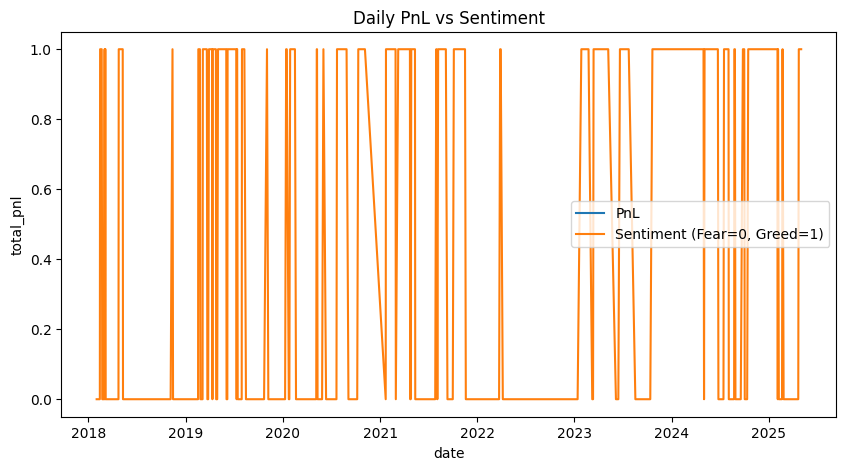

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(data=merged, x='date', y='total_pnl', label='PnL')
sns.lineplot(data=merged, x='date', y='sentiment_num', label='Sentiment (Fear=0, Greed=1)')
plt.title("Daily PnL vs Sentiment")
plt.legend()
plt.show()

In [40]:
import os
os.makedirs('csv_files', exist_ok=True)

In [44]:
import os
os.makedirs('outputs', exist_ok=True)

In [45]:
daily.to_csv("csv_files/daily_aggregates.csv", index=False)

In [46]:
plt.savefig("outputs/sentiment_vs_pnl.png")

<Figure size 640x480 with 0 Axes>